In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [58]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/strategic-coder/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [59]:
data=pd.read_csv(path+"/shopping_trends.csv")

In [60]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [62]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [63]:
data.shape

(3900, 19)

In [64]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [65]:
data.duplicated().sum()

np.int64(0)

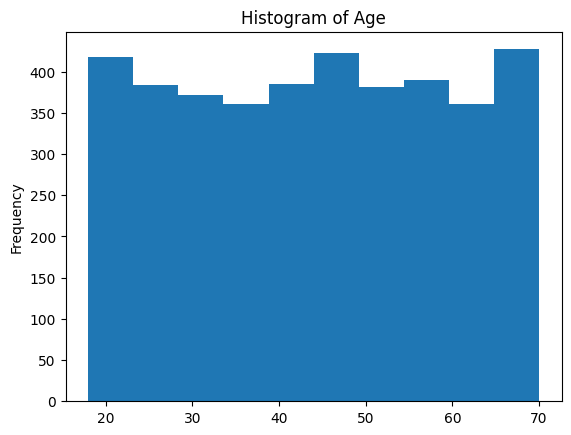

In [66]:
data["Age"].plot(kind="hist")
plt.title("Histogram of Age")
plt.show()

In [67]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

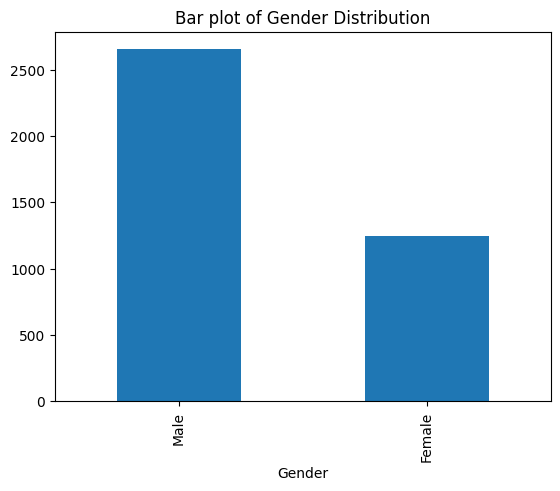

In [68]:
data["Gender"].value_counts().plot(kind="bar")
plt.title("Bar plot of Gender Distribution")
plt.show()

In [69]:
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head(2)

Category
Footwear    60.255426
Clothing    60.025331
Name: Purchase Amount (USD), dtype: float64

In [70]:
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).tail(2)

Category
Accessories    59.83871
Outerwear      57.17284
Name: Purchase Amount (USD), dtype: float64

In [71]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [72]:
data.sort_values("Review Rating",ascending=False,inplace=True)

In [73]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2393,2394,58,Male,Socks,Clothing,97,Louisiana,M,Brown,Winter,5.0,No,Debit Card,2-Day Shipping,No,No,38,PayPal,Every 3 Months
2405,2406,69,Male,Jeans,Clothing,97,California,XL,Silver,Fall,5.0,No,Venmo,Standard,No,No,5,Debit Card,Quarterly
600,601,22,Male,Hat,Accessories,63,South Carolina,M,Charcoal,Spring,5.0,Yes,Debit Card,2-Day Shipping,Yes,Yes,25,Venmo,Monthly
3467,3468,18,Female,Scarf,Accessories,45,Texas,M,Charcoal,Fall,5.0,No,Bank Transfer,Next Day Air,No,No,5,Credit Card,Annually
507,508,65,Male,Shorts,Clothing,20,Maine,M,Magenta,Spring,5.0,Yes,Bank Transfer,Store Pickup,Yes,Yes,33,Debit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2381,41,Male,Scarf,Accessories,66,Pennsylvania,M,Black,Fall,2.5,No,Credit Card,Next Day Air,No,No,36,PayPal,Fortnightly
133,134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Venmo,Annually
2724,2725,52,Female,Sneakers,Footwear,91,Missouri,M,Brown,Spring,2.5,No,Bank Transfer,Next Day Air,No,No,11,Debit Card,Fortnightly
1889,1890,59,Male,Skirt,Clothing,57,North Carolina,L,Peach,Spring,2.5,No,Debit Card,Next Day Air,No,No,27,Bank Transfer,Weekly


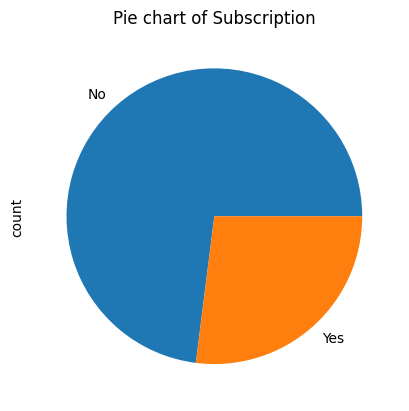

In [74]:
data["Subscription Status"].value_counts().plot(kind = "pie")
plt.title("Pie chart of Subscription")
plt.show()

In [75]:
data["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Pink         153
Charcoal     153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Lavender     147
Beige        147
Indigo       147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

<Axes: ylabel='count'>

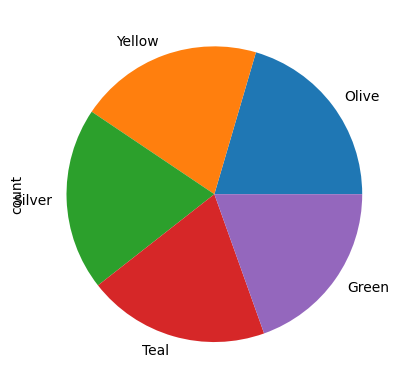

In [76]:
data["Color"].value_counts().head().plot(kind="pie")

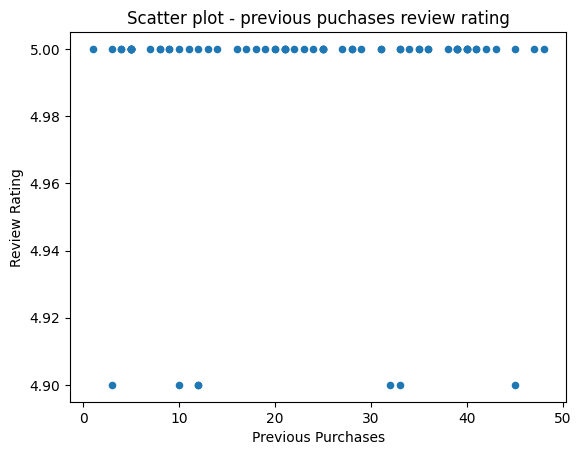

In [80]:
data.head(75).plot(x= "Previous Purchases",y="Review Rating",kind="scatter")
plt.title("Scatter plot - previous puchases review rating")
plt.show()

In [82]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

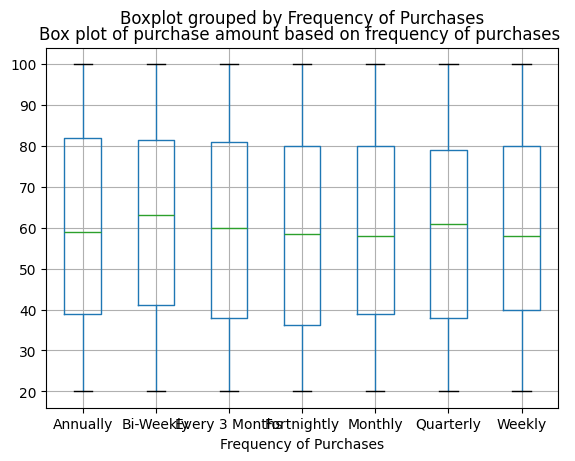

In [83]:
data.boxplot(column="Purchase Amount (USD)",by="Frequency of Purchases")
plt.title("Box plot of purchase amount based on frequency of purchases ")
plt.show()

In [86]:
data["Preferred Payment Method"].value_counts()

Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [87]:
data["Preferred Payment Method"].value_counts().max()

np.int64(677)

In [88]:
data["Preferred Payment Method"].value_counts().sort_values(ascending=False).head(1)

Preferred Payment Method
PayPal    677
Name: count, dtype: int64

In [89]:
data["Preferred Payment Method"].value_counts().sort_values(ascending=False).tail(1)

Preferred Payment Method
Bank Transfer    612
Name: count, dtype: int64

In [91]:
pd.pivot_table(data,values="Purchase Amount (USD)",index="Location",columns="Item Purchased",aggfunc="mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [92]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [93]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

In [94]:
data.groupby("Discount Applied")["Review Rating"].max()

Discount Applied
No     5.0
Yes    5.0
Name: Review Rating, dtype: float64

In [95]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [96]:
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [97]:
data.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [98]:
data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

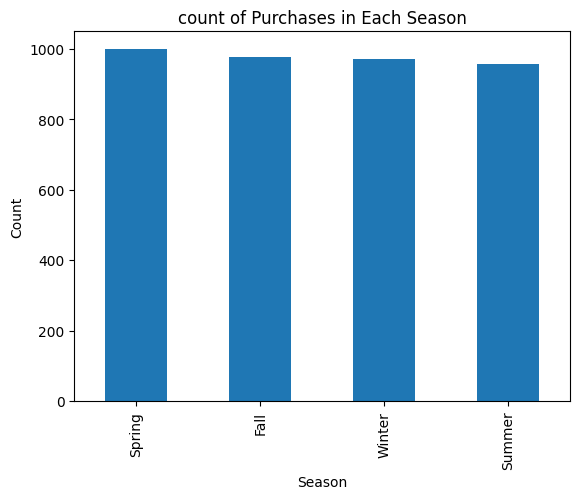

In [99]:
data["Season"].value_counts().plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("count of Purchases in Each Season")
plt.show()

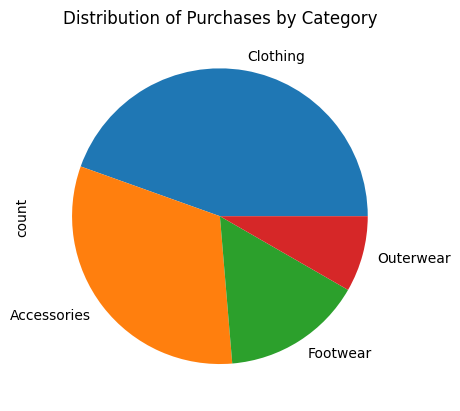

In [101]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Distribution of Purchases by Category")
plt.show()

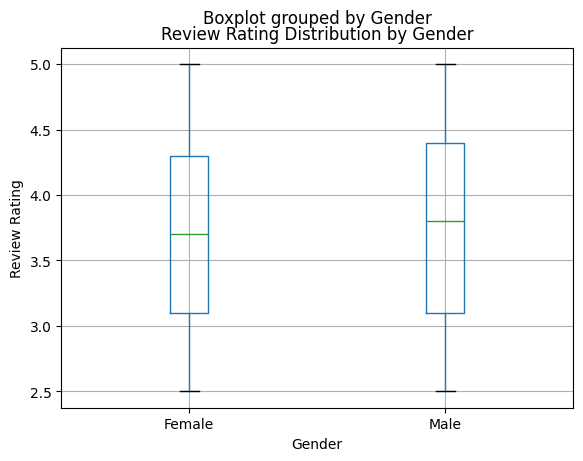

In [104]:
data.boxplot(column= "Review Rating",by="Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Gender")
plt.show()

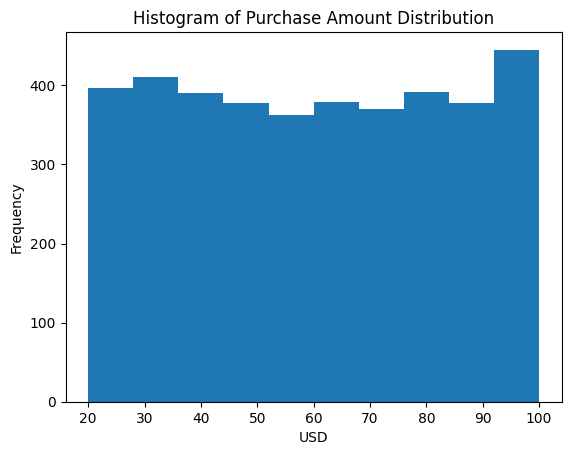

In [105]:
data["Purchase Amount (USD)"].plot(kind="hist",bins=10)
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Histogram of Purchase Amount Distribution")
plt.show()

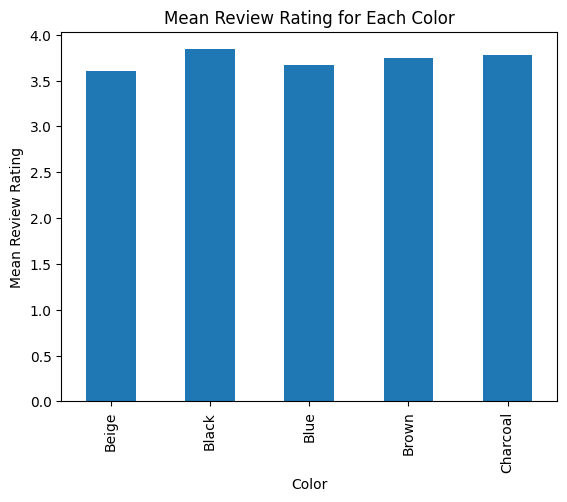

In [109]:
data.groupby("Color")["Review Rating"].mean().head().plot(kind="bar")
plt.xlabel("Color")
plt.ylabel("Mean Review Rating")
plt.title("Mean Review Rating for Each Color")
plt.show()

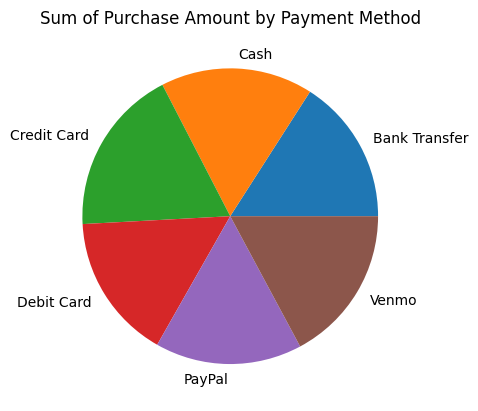

In [110]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.title("Sum of Purchase Amount by Payment Method")
plt.ylabel("")
plt.show()

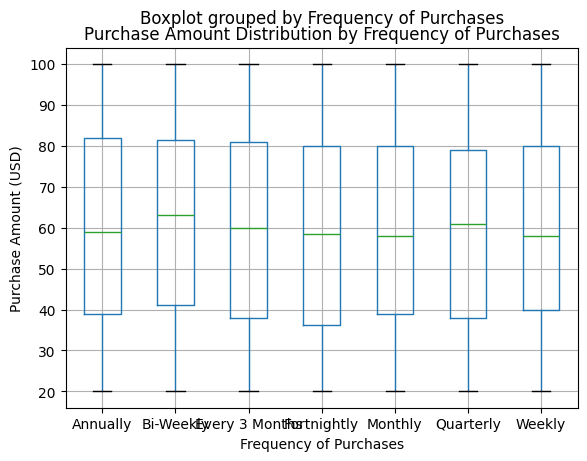

In [112]:
data.boxplot(column="Purchase Amount (USD)",by= "Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Frequency of Purchases")
plt.show()

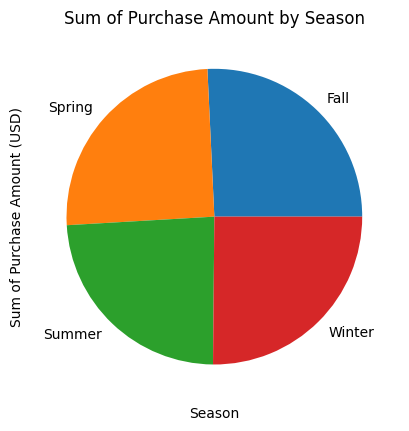

In [113]:
data.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.xlabel("Season")
plt.ylabel("Sum of Purchase Amount (USD)")
plt.title("Sum of Purchase Amount by Season")
plt.show()